In [1]:
from analysis.utils import module_reload
module_reload('analysis')
from analysis.import_data import import_true_reco
from analysis.calc import get_kinematics
from analysis.plot_matplotlib import plot_hist, export_figures
import seaborn as sns
import numpy as np
import pandas as pd
import json

/nfs/dust/ilc/user/bliewert/miniconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = import_true_reco()
zhh = df[df['is_zhh'] == 1]
zzh = df[df['is_zzh'] == 1]
data = {
    'zhh': zhh,
    'zzh': zzh
}

repo_dir = '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP'

Using cached file from /nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/cache/compare_truejet_matchingreco.root_zhh_zzh.npy


In [3]:
module_reload('analysis')
from analysis.calc import get_kinematics
from analysis.cffi.Physsim import lib

In [4]:
n_samples = min(len(zhh), len(zzh))

results = {
    'zhh': {},
    'zzh': {}
}

for key, dt in data.items():
    result = {
        'zhh': [],
        'zzh': [],
        'is_zhh': []
    }

    for i in dt.index.values[:n_samples]:
        kin = get_kinematics(dt, True, i) # Switch to True/False
        res_zhh = lib.calculate_me(kin, mode=1)
        res_zzh = lib.calculate_me(kin, mode=0)
        
        result['zhh'].append(res_zhh)
        result['zzh'].append(res_zzh)
        result['is_zhh'].append(dt['is_zhh'][i])
        
    results[key] = result
        
for key in list(results.keys()):
    results[key] = pd.DataFrame(results[key])

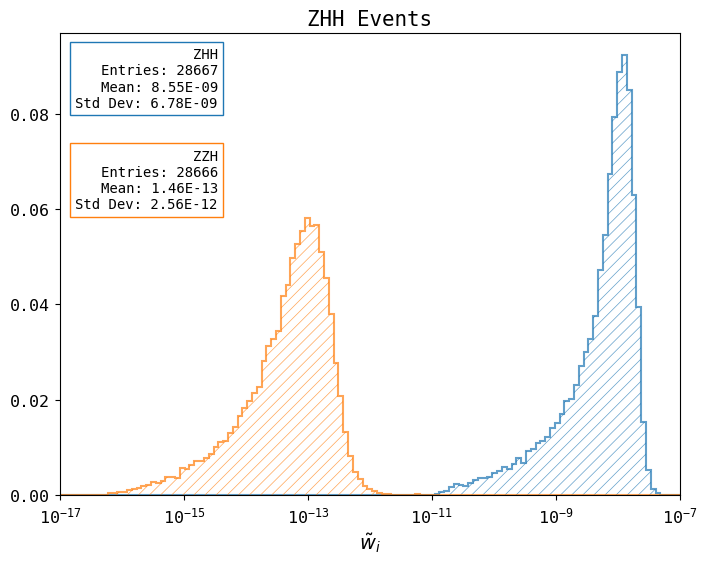

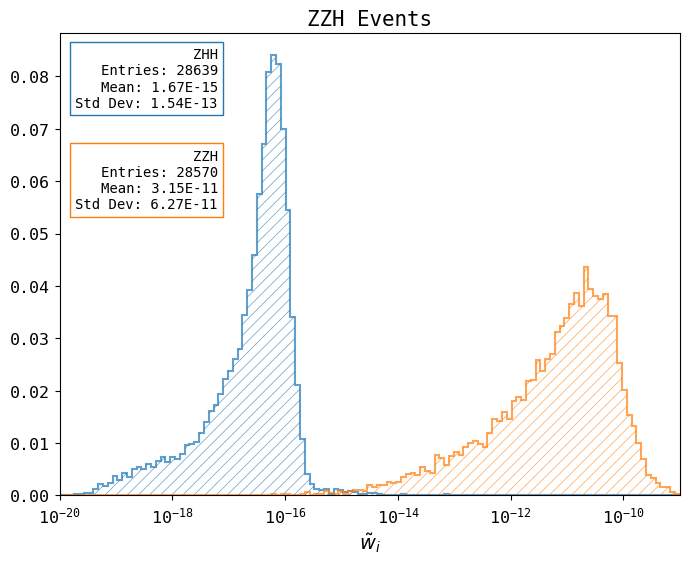

In [10]:
figures = []
limits = { 'zhh': (1e-17, 1e-7), 'zzh': (1e-20, 1e-9) }

for key, df in results.items():
    fig = plot_hist(df, x=['zhh', 'zzh'], scientific_stats=True, xscale='log', text_start_x=.255, xlim=limits[key],
            labels=['ZHH', 'ZZH'], xlabel=r'$\tilde{w}_i$', normalize=True, title=f'{key.upper()} Events');
    
    figures.append(fig)

export_figures(f'{repo_dir}/notebooks/results/3_gen_level_check_mcp.pdf', figures)

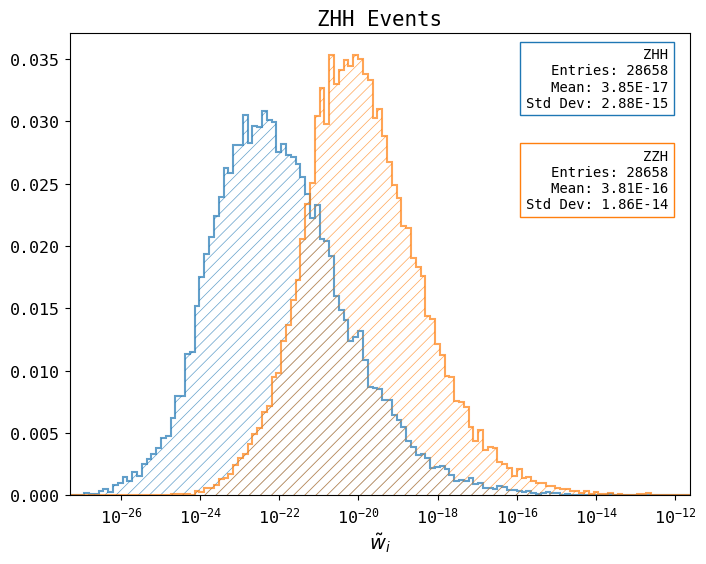

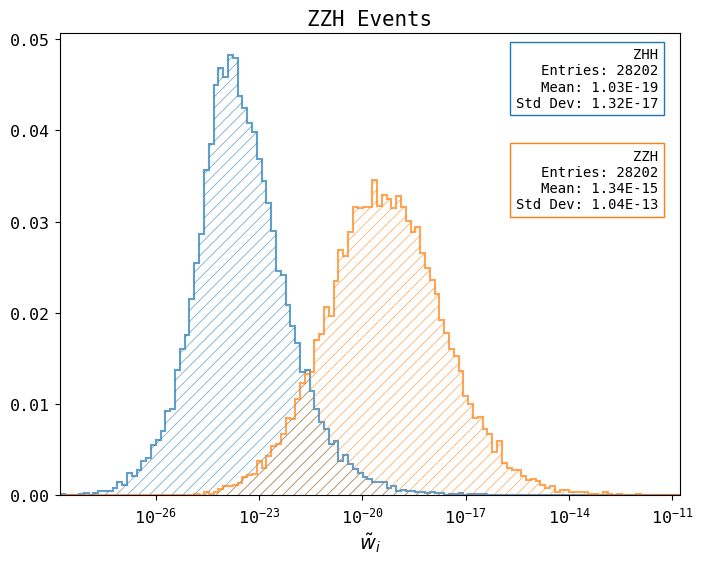

: 

In [10]:
figures = []
for key, df in results.items():
    dt = df[(df['zhh'] > 0) & (df['zzh'] > 0)]
    fig = plot_hist(dt, x=['zhh', 'zzh'], scientific_stats=True, xscale='log',
            labels=['ZHH', 'ZZH'], xlabel=r'$\tilde{w}_i$', normalize=True, title=f'{key.upper()} Events');
    
    figures.append(fig)

export_figures(f'{repo_dir}/notebooks/results/3_gen_level_check_reco.pdf', figures)